In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [15]:
data=pd.read_csv('advertisement_channel.csv')

In [16]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [17]:
df=pd.DataFrame(data)

In [18]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [19]:
df.shape

(200, 5)

The dataset has 200 rows and 5 columns

In [20]:
df.keys()

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

sales is the Target variable and is continuous in nature and it is a Regression problem

In [21]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

We can see the data type of each column from the above table

In [22]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no null values in the dataset

In [23]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


The above table gives the statistical data about the dataframe.
sts gives us the details how much the data is spread.
Since mean>median there is little skewness.
Also there is outlier in the newspapaer column

# Checking for Outliers

Unnamed: 0       AxesSubplot(0.125,0.536818;0.110714x0.343182)
TV            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
radio         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
newspaper     AxesSubplot(0.523571,0.536818;0.110714x0.343182)
sales         AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

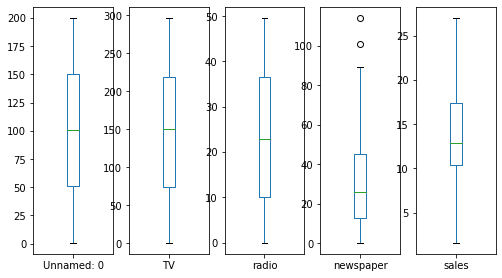

In [48]:

df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

There is outlier in newspaper column

# Checking for Skewness

In [49]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

There is skewness in newspaper column

# Checking for multicollinearity

In [50]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

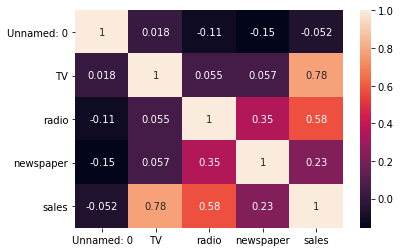

In [51]:
sns.heatmap(df.corr(),annot=True)

Lighter shades are highly correlated

# Dropping the unnecessary feature unnamed

In [52]:
x1=df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [53]:
x1=df

In [54]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:>

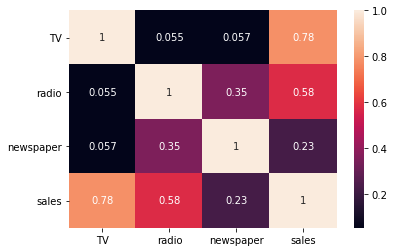

In [55]:
sns.heatmap(df.corr(),annot=True)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

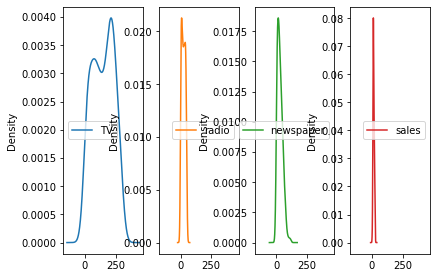

In [56]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(10,10))  


<AxesSubplot:xlabel='TV', ylabel='Density'>

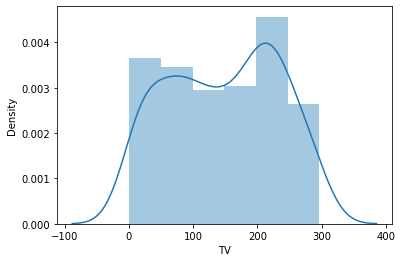

In [106]:
sns.distplot(df['TV'])

The above grapg shoes the distribution of TV Column

<AxesSubplot:xlabel='radio', ylabel='Density'>

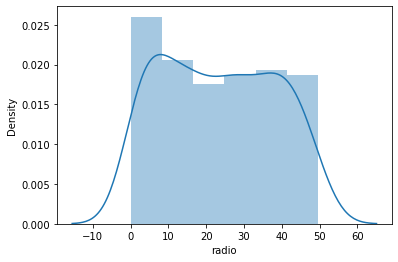

In [107]:
sns.distplot(df['radio'])

The above grapg shoes the distribution of radio Column

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

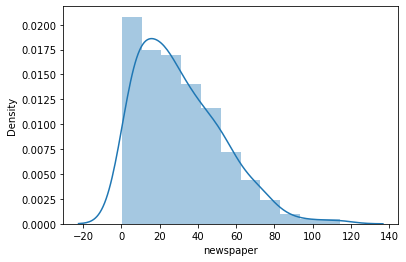

In [108]:
sns.distplot(df['newspaper'])

The above grapg shoes the distribution of newspaper Column

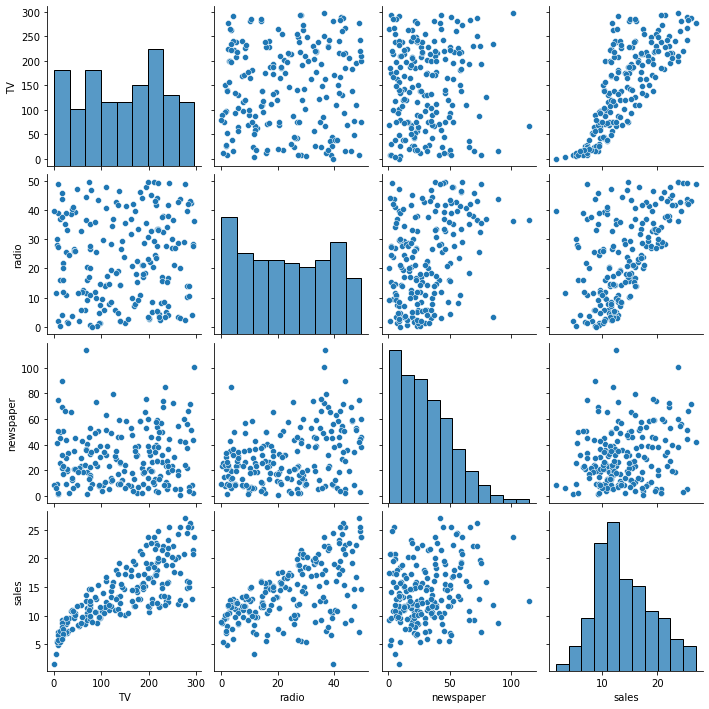

In [109]:
sns.pairplot(df)

The pair plot gives the information how the data is distributed when plotted against each column

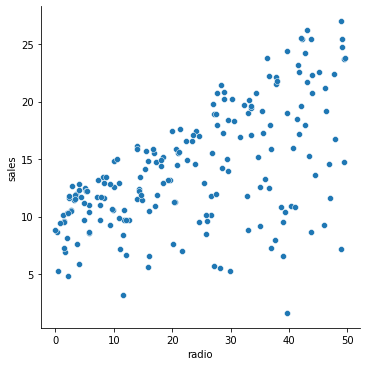

In [112]:
sns.relplot(data=df,x=df['radio'],y=df['sales'])

From the above plot we can see that there is a increase in the radio sales

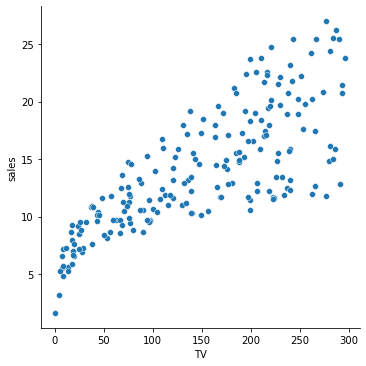

In [111]:
sns.relplot(data=df,x=df['TV'],y=df['sales'])

From the above plot we can see that there is a increase in the TV  sales and it is spread.

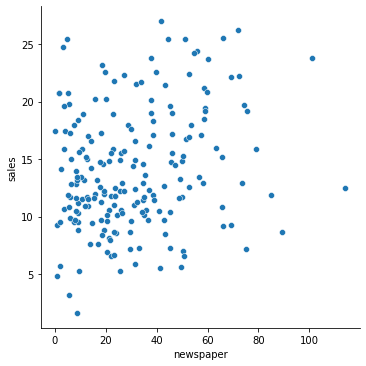

In [113]:
sns.relplot(data=df,x=df['newspaper'],y=df['sales'])

From the above plot we can see that the newspaper sales is spread 

C:\Users\GR20258288\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='count'>

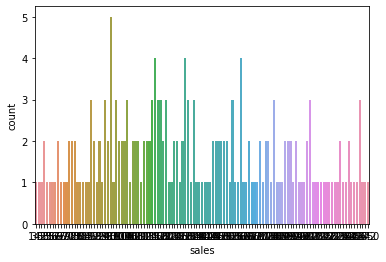

In [25]:
sns.countplot(df['sales'])

The above plot gives the distribution of sales

# Removinf Outliers

In [26]:
z=np.abs(zscore(df))

In [27]:
df_new=df[(z<3).all(axis=1)]

In [28]:
df.shape

(200, 5)

In [29]:
df_new.shape

(198, 5)

# Skewness of the new dataset

In [30]:
df_new.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

# Using yeo-johnson transform method to remove skewness

In [31]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [32]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [33]:
x

array([[-2.08112123,  0.95598306,  0.9691098 ,  1.6041965 ],
       [-2.03541299, -1.19200349,  1.04623436,  0.83104401],
       [-1.99380721, -1.6461253 ,  1.37296802,  1.60705249],
       [-1.95500804,  0.14293428,  1.1473316 ,  1.28376774],
       [-1.91830818,  0.45645241, -0.73502642,  1.28062154],
       [-1.88326684, -1.8204008 ,  1.51543955,  1.76610727],
       [-1.84958541, -1.00349358,  0.70309642, -0.10205346],
       [-1.81704952, -0.20996049, -0.0876566 , -0.84968895],
       [-1.78549851, -1.82264543, -1.62948287, -2.09866461],
       [-1.754808  ,  0.652694  , -1.56152179, -0.22649933],
       [-1.72487914, -0.88482761, -1.19258569, -0.06553382],
       [-1.69563166,  0.80322028,  0.19357553, -1.59608414],
       [-1.66699926, -1.52567125,  0.82725998,  1.50859232],
       [-1.63892633, -0.48090308, -1.01613619, -1.23269654],
       [-1.61136564,  0.69642374,  0.70856268,  0.86367455],
       [-1.58427663,  0.60769456,  1.45886692,  1.1026083 ],
       [-1.53137745,  1.

# Scaling the data

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Model selection

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 

In [38]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9013624575456813
At random state 0,the testing accuracy is:- 0.9146519827987244


At random state 1,the training accuracy is:- 0.9077514360485811
At random state 1,the testing accuracy is:- 0.8883139576066574


At random state 2,the training accuracy is:- 0.9147899503637928
At random state 2,the testing accuracy is:- 0.867081775664214


At random state 3,the training accuracy is:- 0.9040831806758858
At random state 3,the testing accuracy is:- 0.9075404834679128


At random state 4,the training accuracy is:- 0.9080633872155587
At random state 4,the testing accuracy is:- 0.8798606489629512


At random state 5,the training accuracy is:- 0.904512569921594
At random state 5,the testing accuracy is:- 0.8937830174017428


At random state 6,the training accuracy is:- 0.9072878883730298
At random state 6,the testing accuracy is:- 0.8912767186695632


At random state 7,the training accuracy is:- 0.9036990998054495
At random state 7,the testing accur

In [ ]:
At random state 86 the accuracy is 

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=86)

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
pred_test=lr.predict(x_test)

In [42]:
pred_test

array([ 7.95529108, 14.96712036,  6.33255137, 12.22134668, 11.35317892,
        9.54137156, 12.42038926, 20.21413348,  5.09742049, 10.45896585,
       16.85819995, 15.45093803, 16.15371959, 17.73336014, 15.07497975,
       20.39431468, 16.67215432, 10.39490432, 10.26068066, 19.89246516,
       17.4135321 , 23.01836729,  2.17359135,  9.80812579,  7.23665804,
       18.6233668 , 16.8349784 , 17.7973245 , 14.30899776, 16.98463612,
       20.61211802, 13.62163079,  4.60127941, 19.1729907 , 18.57589357,
       12.93520232,  6.17154099, 10.82734484, 23.33195171, 13.84320448])

In [43]:
print(r2_score(y_test,pred_test))

0.9008751057157606


In [44]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8822554688777031 and accuracy score for training is -0.7747875356304303 and accuracy for the testing is 0.9008751057157606


At cross fold 3 the cv score is 0.8967803175870005 and accuracy score for training is -0.7747875356304303 and accuracy for the testing is 0.9008751057157606


At cross fold 4 the cv score is 0.8926383342167619 and accuracy score for training is -0.7747875356304303 and accuracy for the testing is 0.9008751057157606


At cross fold 5 the cv score is 0.8934477544725892 and accuracy score for training is -0.7747875356304303 and accuracy for the testing is 0.9008751057157606


At cross fold 6 the cv score is 0.8958573772376907 and accuracy score for training is -0.7747875356304303 and accuracy for the testing is 0.9008751057157606


At cross fold 7 the cv score is 0.891247449296621 and accuracy score for training is -0.7747875356304303 and accuracy for the testing is 0.9008751057157606


At cross fold 8 the cv score is 0.8956422782886

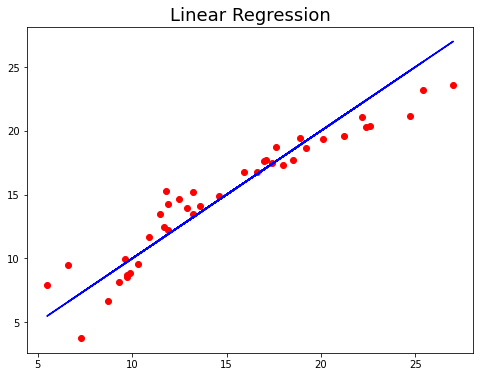

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.title('Linear Regression',fontsize=18)
plt.show()

# Ridge regression

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [50]:
Rid = Ridge(alpha=1,random_state=0)
Rid.fit(x_train,y_train)
Rid.score(x_train,y_train)
pred_Rid = Rid.predict(x_test)

Ridg = r2_score(y_test,pred_Rid)
Ridg

0.9015413330230244

In [51]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8935398464874877

The r2 score is 90.1 and the CV score is 89.3 for the Ridge regresor model

# Lasso Regression

In [52]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [53]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.9064085520441598

In [54]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8957805633532875

The r2 score is 90.6 and the CV score is 89.5 for the Lasso regresor model

In [55]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor



In [56]:
parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters) 
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [57]:
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 98.18686441973848
Cross Val Score: 97.41340961461304


The R2 score is 98 and CV score is 98 after rounding the values.Hence Random ForesyRegressor is the best model